In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,  confusion_matrix,  accuracy_score, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import xgboost as xbg
from sklearn.pipeline import Pipeline
import catboost as cat

In [2]:
train_data = pd.read_csv(r'C:\Users\user\OneDrive\Documents\code\zindi\store\train.csv')
test_data = pd.read_csv(r'C:\Users\user\OneDrive\Documents\code\zindi\store\test.csv') 

In [3]:
print(train_data.shape)
print(test_data.shape)

(4990, 13)
(3532, 12)


In [4]:
train_y = train_data['Item_Store_Returns']

In [5]:
test_id = test_data['Item_Store_ID']

In [6]:
train_data = train_data.drop(['Item_Store_ID'], axis =1)
test_data = test_data.drop(['Item_Store_ID'], axis =1)

In [7]:
train_data.head(3)

,Item_ID,Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69


In [8]:
print(train_data.nunique(),test_data.nunique())

Item_ID                1451
Store_ID                 10
Item_Weight             399
Item_Sugar_Content        3
Item_Visibility        4638
Item_Type                16
Item_Price             3522
Store_Start_Year          9
Store_Size                3
Store_Location_Type       3
Store_Type                4
Item_Store_Returns     2686
dtype: int64 Item_ID                1207
Store_ID                 10
Item_Weight             354
Item_Sugar_Content        3
Item_Visibility        3294
Item_Type                16
Item_Price             2704
Store_Start_Year          9
Store_Size                3
Store_Location_Type       3
Store_Type                4
dtype: int64


In [9]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Item_ID                   0
Store_ID                  0
Item_Weight             802
Item_Sugar_Content        0
Item_Visibility           0
Item_Type                 0
Item_Price                0
Store_Start_Year          0
Store_Size             1450
Store_Location_Type       0
Store_Type                0
Item_Store_Returns        0
dtype: int64
Item_ID                  0
Store_ID                 0
Item_Weight            661
Item_Sugar_Content       0
Item_Visibility          0
Item_Type                0
Item_Price               0
Store_Start_Year         0
Store_Size             959
Store_Location_Type      0
Store_Type               0
dtype: int64


In [10]:
miss = ['Item_Weight', 'Store_Size']


train_data['Item_Weight'] = train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())
train_data['Store_Size'] = train_data[ 'Store_Size'].fillna(train_data[ 'Store_Size'].value_counts().index[0])
test_data['Item_Weight'] = test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean())
test_data['Store_Size'] = test_data[ 'Store_Size'].fillna(test_data[ 'Store_Size'].value_counts().index[0])

In [11]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Item_ID                0
Store_ID               0
Item_Weight            0
Item_Sugar_Content     0
Item_Visibility        0
Item_Type              0
Item_Price             0
Store_Start_Year       0
Store_Size             0
Store_Location_Type    0
Store_Type             0
Item_Store_Returns     0
dtype: int64
Item_ID                0
Store_ID               0
Item_Weight            0
Item_Sugar_Content     0
Item_Visibility        0
Item_Type              0
Item_Price             0
Store_Start_Year       0
Store_Size             0
Store_Location_Type    0
Store_Type             0
dtype: int64


In [12]:
columns = train_data.columns
columns

Index(['Item_ID', 'Store_ID', 'Item_Weight', 'Item_Sugar_Content',
       'Item_Visibility', 'Item_Type', 'Item_Price', 'Store_Start_Year',
       'Store_Size', 'Store_Location_Type', 'Store_Type',
       'Item_Store_Returns'],
      dtype='object')

In [13]:
cols = []

for col in columns:
    if train_data[col].dtype == 'object':
        cols.append(col)

In [14]:
label = LabelEncoder()

for col in cols:
    train_data[col] = label.fit_transform(train_data[col])
    test_data[col] = label.fit_transform(test_data[col])

In [15]:
train_data.head(3)

,Item_ID,Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,0,0,11.6,0,0.068535,14,357.54,2005,1,2,0,709.08
1,0,1,11.6,0,0.040912,14,355.79,1994,0,2,1,6381.69
2,0,2,11.6,0,0.041178,14,350.79,2014,1,1,1,6381.69


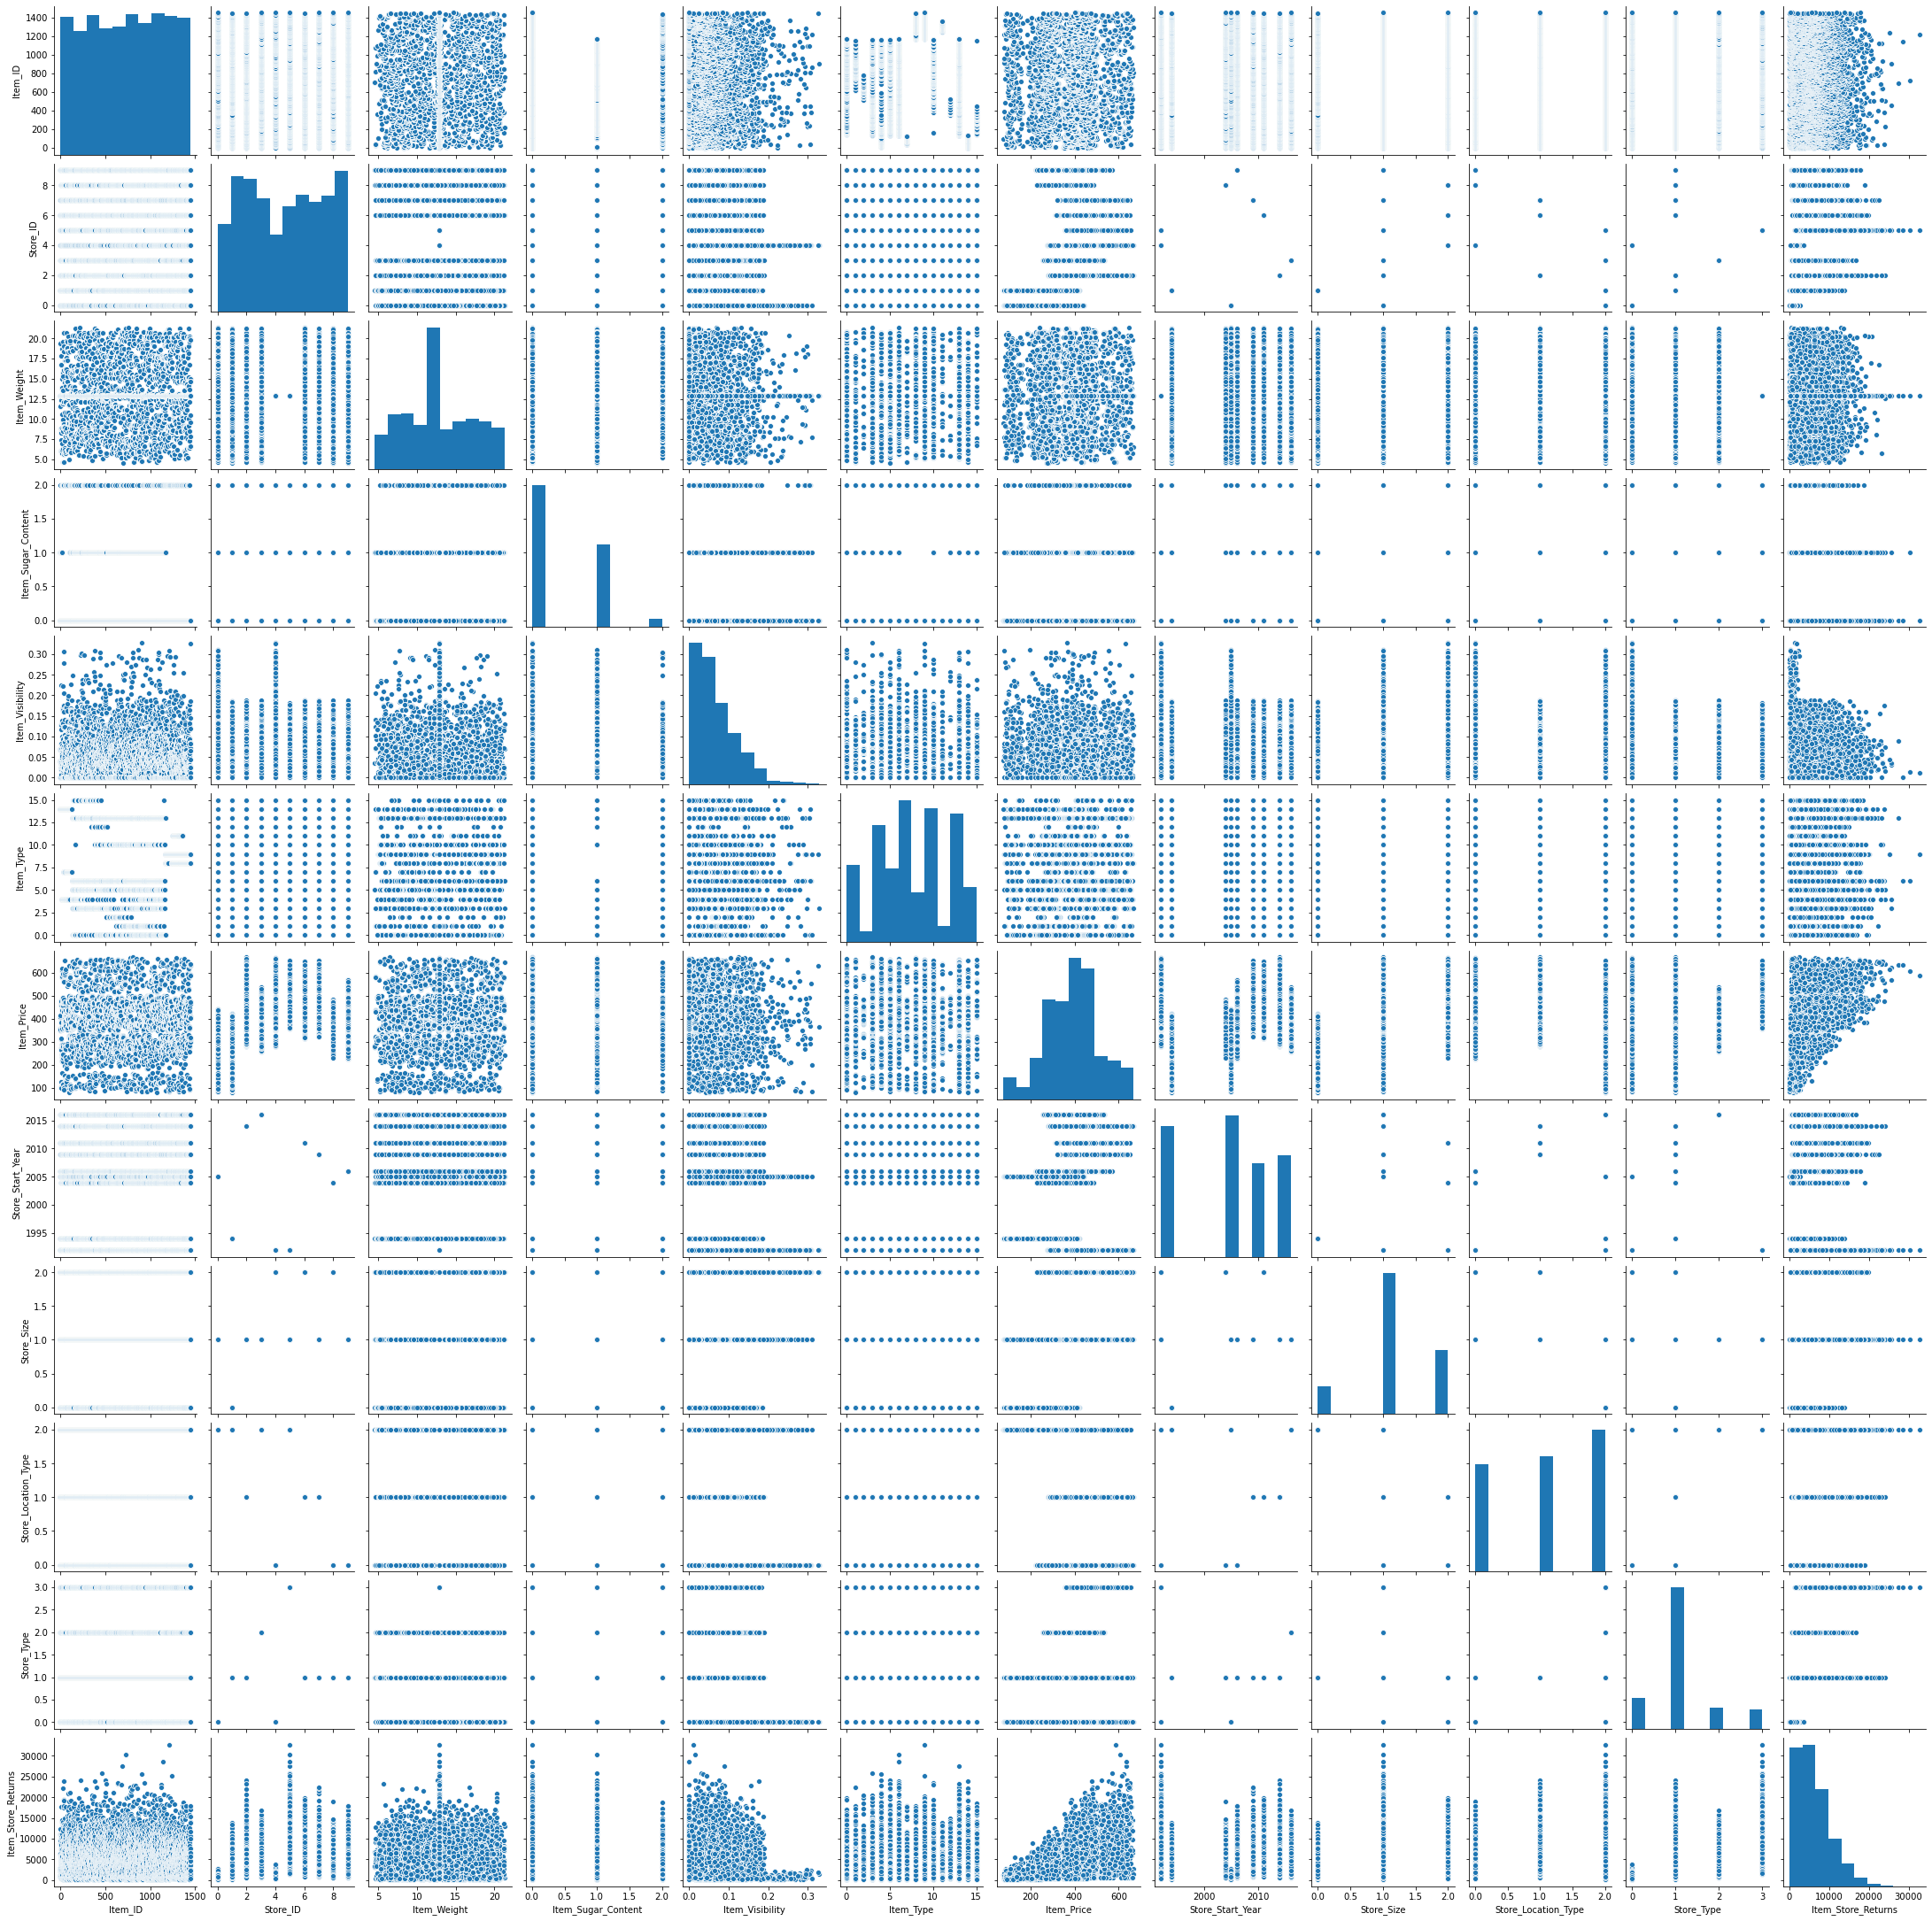

In [16]:
sns.pairplot(train_data)

In [17]:
train_x = train_data.drop(['Item_Store_Returns'], axis = 1)

In [18]:
trainx, test_x, trainy, test_y = train_test_split(train_x, train_y, random_state = 39, test_size = 0.3)

In [56]:
xgb = xbg.XGBRegressor(learning_rate=0.01, max_depth =7, n_estimators = 500)
ran = RandomForestRegressor(n_estimators = 1000,max_depth =7)
cat = cat.CatBoostRegressor(learning_rate=0.01, depth = 7,n_estimators = 500,l2_leaf_reg = 6)

In [40]:
xgb.fit(trainx, trainy)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
ran.fit(trainx, trainy)

RandomForestRegressor(max_depth=7, n_estimators=500)

In [57]:
cat.fit(trainx, trainy)

0:	learn: 4487.9851090	total: 55ms	remaining: 27.4s
1:	learn: 4465.1603425	total: 74.5ms	remaining: 18.5s
2:	learn: 4443.5677179	total: 97ms	remaining: 16.1s
3:	learn: 4422.0211507	total: 115ms	remaining: 14.3s
4:	learn: 4399.8858210	total: 120ms	remaining: 11.9s
5:	learn: 4378.4543583	total: 133ms	remaining: 10.9s
6:	learn: 4357.7648804	total: 145ms	remaining: 10.2s
7:	learn: 4337.3919553	total: 149ms	remaining: 9.15s
8:	learn: 4317.9348919	total: 151ms	remaining: 8.24s
9:	learn: 4297.8088218	total: 154ms	remaining: 7.53s
10:	learn: 4281.2645688	total: 170ms	remaining: 7.55s
11:	learn: 4261.1607297	total: 182ms	remaining: 7.4s
12:	learn: 4243.7427357	total: 189ms	remaining: 7.1s
13:	learn: 4224.9437787	total: 192ms	remaining: 6.66s
14:	learn: 4205.6563868	total: 196ms	remaining: 6.33s
15:	learn: 4187.9353574	total: 211ms	remaining: 6.39s
16:	learn: 4170.3284110	total: 215ms	remaining: 6.11s
17:	learn: 4151.7381294	total: 218ms	remaining: 5.83s
18:	learn: 4134.3921578	total: 219ms	rema

158:	learn: 3040.2485011	total: 1.81s	remaining: 3.88s
159:	learn: 3037.3563956	total: 1.83s	remaining: 3.89s
160:	learn: 3035.0333886	total: 1.84s	remaining: 3.87s
161:	learn: 3032.7748139	total: 1.85s	remaining: 3.87s
162:	learn: 3029.9630034	total: 1.86s	remaining: 3.85s
163:	learn: 3027.4702571	total: 1.87s	remaining: 3.84s
164:	learn: 3025.0604920	total: 1.88s	remaining: 3.83s
165:	learn: 3022.9138392	total: 1.89s	remaining: 3.8s
166:	learn: 3020.3330631	total: 1.9s	remaining: 3.79s
167:	learn: 3017.6236179	total: 1.91s	remaining: 3.77s
168:	learn: 3015.3292718	total: 1.92s	remaining: 3.76s
169:	learn: 3012.9128967	total: 1.94s	remaining: 3.76s
170:	learn: 3011.4492624	total: 1.94s	remaining: 3.73s
171:	learn: 3009.3324736	total: 1.95s	remaining: 3.72s
172:	learn: 3007.0782243	total: 1.96s	remaining: 3.71s
173:	learn: 3004.7643977	total: 1.97s	remaining: 3.7s
174:	learn: 3002.6020008	total: 1.99s	remaining: 3.69s
175:	learn: 3000.5655599	total: 1.99s	remaining: 3.66s
176:	learn: 2

319:	learn: 2834.6253084	total: 3.78s	remaining: 2.13s
320:	learn: 2833.3285128	total: 3.8s	remaining: 2.12s
321:	learn: 2832.7138547	total: 3.82s	remaining: 2.11s
322:	learn: 2832.0645696	total: 3.83s	remaining: 2.1s
323:	learn: 2831.5891420	total: 3.84s	remaining: 2.09s
324:	learn: 2830.9214501	total: 3.85s	remaining: 2.08s
325:	learn: 2830.6074755	total: 3.86s	remaining: 2.06s
326:	learn: 2828.9257733	total: 3.87s	remaining: 2.05s
327:	learn: 2828.0182495	total: 3.88s	remaining: 2.04s
328:	learn: 2827.0744625	total: 3.9s	remaining: 2.02s
329:	learn: 2826.5146516	total: 3.91s	remaining: 2.01s
330:	learn: 2825.4608934	total: 3.92s	remaining: 2s
331:	learn: 2824.9143915	total: 3.94s	remaining: 1.99s
332:	learn: 2824.5038468	total: 3.95s	remaining: 1.98s
333:	learn: 2823.9056204	total: 3.97s	remaining: 1.97s
334:	learn: 2822.9610486	total: 3.98s	remaining: 1.96s
335:	learn: 2822.2566007	total: 4s	remaining: 1.95s
336:	learn: 2821.9948486	total: 4s	remaining: 1.93s
337:	learn: 2821.17009

473:	learn: 2727.5428190	total: 6.15s	remaining: 337ms
474:	learn: 2726.9584850	total: 6.17s	remaining: 325ms
475:	learn: 2726.2565013	total: 6.19s	remaining: 312ms
476:	learn: 2725.6987957	total: 6.21s	remaining: 299ms
477:	learn: 2725.2404187	total: 6.23s	remaining: 287ms
478:	learn: 2724.5263313	total: 6.25s	remaining: 274ms
479:	learn: 2724.0977916	total: 6.26s	remaining: 261ms
480:	learn: 2723.4455633	total: 6.28s	remaining: 248ms
481:	learn: 2722.7960330	total: 6.31s	remaining: 236ms
482:	learn: 2721.7266777	total: 6.33s	remaining: 223ms
483:	learn: 2720.6630071	total: 6.35s	remaining: 210ms
484:	learn: 2720.1001973	total: 6.38s	remaining: 197ms
485:	learn: 2719.6489396	total: 6.4s	remaining: 184ms
486:	learn: 2719.1750149	total: 6.42s	remaining: 171ms
487:	learn: 2718.0501729	total: 6.43s	remaining: 158ms
488:	learn: 2717.2619424	total: 6.45s	remaining: 145ms
489:	learn: 2717.1104502	total: 6.45s	remaining: 132ms
490:	learn: 2716.6066304	total: 6.47s	remaining: 119ms
491:	learn:

In [58]:
#val = xgb.predict(test_x)
#vals = ran.predict(test_x)
valss = cat.predict(test_x)

In [44]:
#print(accuracy_score(test_y, val))
print(mean_squared_error(test_y, val))


8675446.744111728


In [59]:
print( mean_squared_error(test_y, vals))
print( mean_squared_error(test_y, valss))

8467078.651033238
8285516.726547835


In [60]:
#test_val = xgb.predict(test_data)
#test_vals = ran.predict(test_data)
test_valss = cat.predict(test_data)

In [47]:
sub = {'Item_Store_ID': test_id, 'Item_Store_Returns': test_val}
ans = pd.DataFrame(sub)
ans.to_csv('submission-4.csv', index =False)

In [48]:
sub = {'Item_Store_ID': test_id, 'Item_Store_Returns': test_vals}
ans = pd.DataFrame(sub)
ans.to_csv('submission-5.csv', index =False)

In [61]:
sub = {'Item_Store_ID': test_id, 'Item_Store_Returns': test_valss}
ans = pd.DataFrame(sub)
ans.to_csv('submission-7.csv', index =False)